## Phase 4 : Analyse pour la réduction des dimensions


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import yaml
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load config
with open('../configs/config.yaml', 'r') as file:
    config = yaml.safe_load(file)

FILE_RFM_DATA = os.path.join("..", config["paths"]["intermediate_data"], config["files"]["data_rfm"])
FILE_PCA_DATA = os.path.join("..", config["paths"]["processed_data"], config["files"]["data_pca"])

In [2]:
# Load RFM features data
rfm_features = pd.read_csv(FILE_RFM_DATA)

### Préparation des données pour l'PCA

In [3]:
# Prepare data for PCA
features = ['Recency', 'Frequency', 'Monetary']
X = rfm_features[features]

### Standardisation des données

In [4]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Application du PCA

In [5]:
# Apply PCA
n_components = config['pca']['n_components']
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

### Visualisation des résultats

Explained variance ratio: [0.55473084 0.30252713]
Total variance explained: 0.8572579763919153


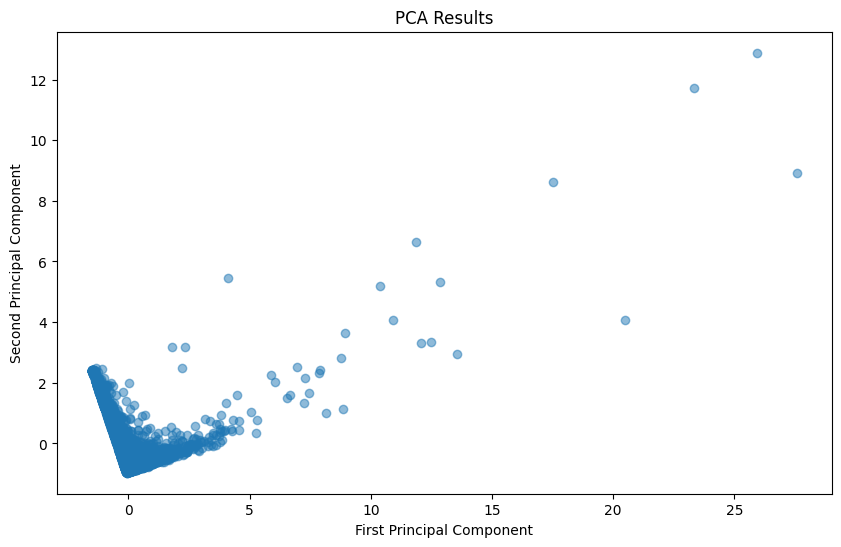

In [6]:
# Create DataFrame with PCA results
pca_df = pd.DataFrame(
    data=X_pca,
    columns=[f'PC{i+1}' for i in range(n_components)]
)

# Explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance explained:", sum(pca.explained_variance_ratio_))

# Visualization of PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Results')
plt.show()

### Importance des caractéristiques

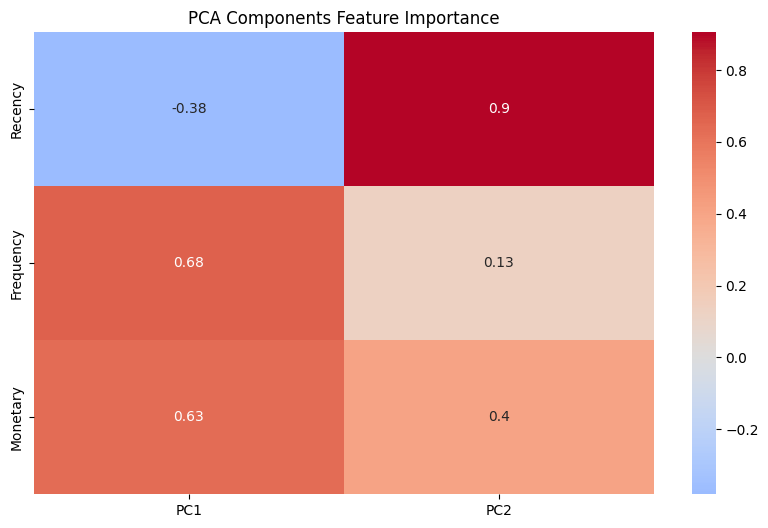

In [7]:
# Feature importance plot
components_df = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(n_components)],
    index=features
)

plt.figure(figsize=(10, 6))
sns.heatmap(components_df, annot=True, cmap='coolwarm', center=0)
plt.title('PCA Components Feature Importance')
plt.show()

### Sauvegarde des résultats


In [8]:
# Save PCA results with original features
result_df = pd.concat([rfm_features, pca_df], axis=1)
result_df.to_csv(FILE_PCA_DATA, index=False)

### Conclusion de l'analyse en composantes principales (PCA)

Dans cette phase, nous avons effectué une réduction de dimensionnalité de nos données RFM à l'aide de la PCA. Les résultats montrent que :

- Les deux premières composantes principales expliquent une part significative de la variance totale des données
- La visualisation des données dans l'espace 2D des composantes principales révèle des patterns intéressants
- L'analyse des contributions des variables originales aux composantes principales nous aide à comprendre les relations entre les caractéristiques

### Phase 5 : Application des techniques d'apprentissage non supervisé

Dans la prochaine phase, nous allons :
- Appliquer des algorithmes de clustering (K-means, DBSCAN) sur nos données transformées par PCA
- Analyser et interpréter les segments de clients obtenus
- Évaluer la qualité des clusters avec différentes métriques
- Caractériser les profils clients typiques de chaque segment
